In [1]:
import pandas as pd

titanic = pd.read_excel('titanic3.xls')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### <font face ='Garamond' >  Find Out Columns And Row in the Dataset

In [25]:
titanic.shape
#columns = 14
#Rows = 1309

(1309, 14)

#### FIND OUT NULL VALUE IN COLUMNS

In [3]:
print(titanic.isnull().values.any())

True


In [4]:
nan_cols = titanic.columns[titanic.isnull().any()]
titanic[nan_cols].isnull().sum()

age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

#### FILL OUT NULL VALUE WITH APPROPRIATE NUMBER

In [5]:
titanic['age'].fillna(titanic['age'].mean(),inplace = True)
titanic['fare'].fillna(titanic['fare'].mean(),inplace = True)
titanic['body'].fillna(titanic['body'].mean(),inplace = True)
titanic.head(1309)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,160.809917,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,C22 C26,S,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.000000,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.000000,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,NaN,C,NaN,160.809917,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.000000,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,160.809917,NaN


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1309 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1309 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         1309 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [26]:
titanic['embarked'].value_counts()

S    916
C    270
Q    123
Name: embarked, dtype: int64

In [7]:
titanic['embarked'].count()
embarked = titanic.groupby('embarked')
data = embarked.get_group('S')
data['embarked'].count()

914

In [8]:
titanic['embarked'].fillna('S',inplace = True)

In [9]:
nan_cols = titanic.columns[titanic.isnull().any()]
titanic[nan_cols].isnull().sum()

cabin        1014
boat          823
home.dest     564
dtype: int64

In [11]:
print(titanic['cabin'].value_counts())

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
F2                 4
                  ..
E40                1
C50                1
A32                1
C47                1
C90                1
Name: cabin, Length: 186, dtype: int64


In [12]:
titanic['cabin'].fillna('C23 C25 C27',inplace = True)

In [13]:
titanic22 = titanic.to_excel('titanic_write.xls',index = False)

<h2><font face ='Garamond' >4. PLOT BARCHART

<h3><font face="verdana">a. <font color = #DC7633> Gender v<font color = #85929E>/s Survived

In [14]:
gender = titanic.groupby('sex')

#FEMALE
gender_female = gender.get_group('female')
print('No of Female :',gender_female['sex'].count())
print('No of Female Survived :',gender_female['survived'].sum())
xx = (gender_female['sex'].count() - gender_female['survived'].sum())
print('No of Female NOT Survived :',xx)


#MALE
gender_male = gender.get_group('male')
print('\nNo of male:',gender_male['sex'].count())
print('No of male Survived :',gender_male['survived'].sum())
xy =(gender_male['sex'].count() - gender_male['survived'].sum())
print('No of male NOT Survived :',xy)

No of Female : 466
No of Female Survived : 339
No of Female NOT Survived : 127

No of male: 843
No of male Survived : 161
No of male NOT Survived : 682


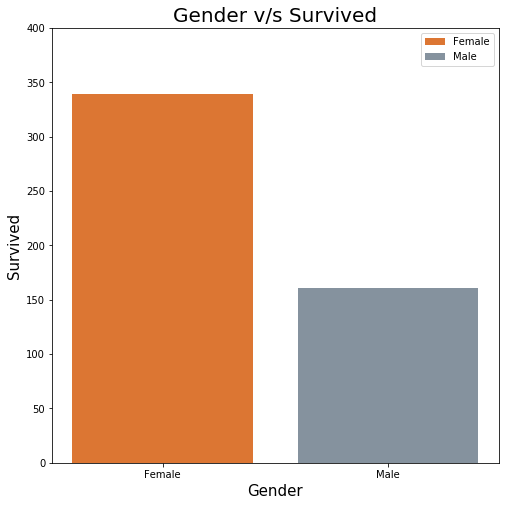

In [24]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Gender',fontsize = 15)
ax.set_ylabel('Survived',fontsize = 15)
ax.set_title('Gender v/s Survived',fontsize = 20)

bars = ['Female','Male']
height = (gender_female['survived'].sum(),gender_male['survived'].sum())
color = ['#DC7633','#85929E']

plt.ylim(0,400)
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)

for y_pos, height,color in zip(y_pos, height,color):
    plt.bar(y_pos, height, color =color)

plt.legend(bars)
plt.show()

### <font face="verdana">b. <font color = #DC7633 > Gender v<font color = #85929E>/s NOT Survived

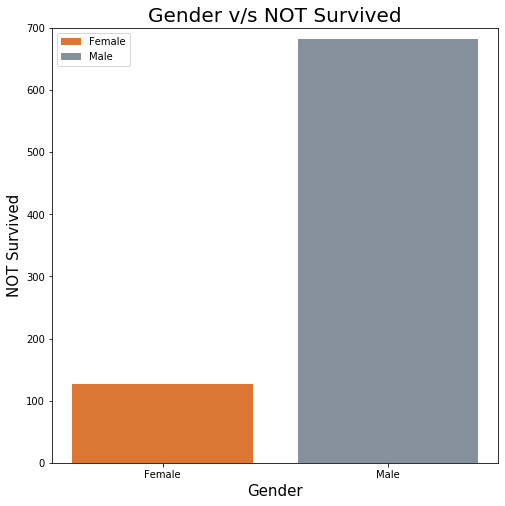

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Gender',fontsize = 15)
ax.set_ylabel('NOT Survived',fontsize = 15)
ax.set_title('Gender v/s NOT Survived',fontsize = 20)

bars = ['Female','Male']
height = (xx,xy)
color = ['#DC7633','#85929E']

plt.ylim(0,700)
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)

for y_pos, height,color in zip(y_pos, height,color):
    plt.bar(y_pos, height, color =color)
plt.legend(bars)
plt.show()


### <font face="verdana">c. <font color = #34495E  > Pclass v<font color = #239B56 >/s Survived

In [17]:
pclass = titanic.groupby('pclass')
pclass_1 = pclass.get_group(1)
print('Total of  pclass 1  : ',pclass_1['pclass'].count())
p1 = pclass_1['survived'].sum()
print('Total no of pclass survived ',p1)


pclass_2 = pclass.get_group(2)
print('\nTotal of  pclass 2  : ',pclass_2['pclass'].count())
p2 = pclass_2['survived'].sum()
print('Total no of pclass survived ',p2)


pclass_3 = pclass.get_group(3)
print('\nTotal of  pclass 3  : ',pclass_3['pclass'].count())
p3 = pclass_3['survived'].sum()
print('Total no of pclass survived ',p3)

Total of  pclass 1  :  323
Total no of pclass survived  200

Total of  pclass 2  :  277
Total no of pclass survived  119

Total of  pclass 3  :  709
Total no of pclass survived  181


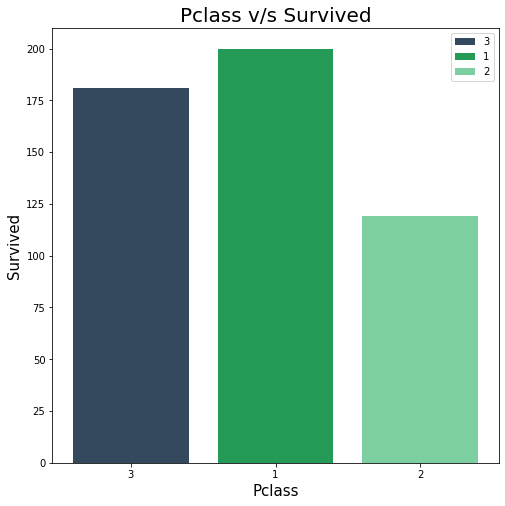

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Pclass',fontsize = 15)
ax.set_ylabel('Survived',fontsize = 15)
ax.set_title('Pclass v/s Survived',fontsize = 20)

bars = ['3','1','2']
height = (p3,p1,p2)
color =['#34495E','#239B56','#7DCEA0']

plt.ylim(0,210)
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)

for y_pos, height,color in zip(y_pos, height,color):
    plt.bar(y_pos, height, color =color)
plt.legend(bars)
plt.show()


### <font face="verdana">d. <font color = #5B2C6F> Part of Embartation  v<font color = #16A085 >/s Survived

In [19]:
titanic['embarked'].value_counts()

S    916
C    270
Q    123
Name: embarked, dtype: int64

In [27]:
embarked = titanic.groupby('embarked')

embarked_S = embarked.get_group('S')
print('Total of  embarked_S  : ',embarked_S['embarked'].count())
e_S = embarked_S['survived'].sum()
print('Total no of embarked_S survived ',e_S)

embarked_C = embarked.get_group('C')
print('\nTotal of  embarked_C  : ',embarked_C['embarked'].count())
e_C = embarked_C['survived'].sum()
print('Total no of embarked_C survived ',e_C)

embarked_Q = embarked.get_group('Q')
print('\nTotal of  embarked_Q  : ',embarked_Q['embarked'].count())
e_Q = embarked_Q['survived'].sum()
print('Total no of embarked_Q survived ',e_Q)



Total of  embarked_S  :  916
Total no of embarked_S survived  306

Total of  embarked_C  :  270
Total no of embarked_C survived  150

Total of  embarked_Q  :  123
Total no of embarked_Q survived  44


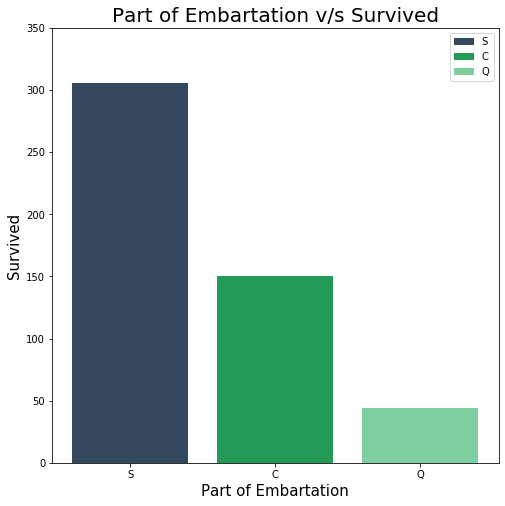

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Part of Embartation',fontsize = 15)
ax.set_ylabel('Survived',fontsize = 15)
ax.set_title('Part of Embartation v/s Survived',fontsize = 20)

bars = ('S','C','Q')
height = (e_S,e_C,e_Q)
color = ['#34495E','#239B56','#7DCEA0']

plt.ylim(0,350)
y_pos = np.arange(len(bars))

plt.xticks(y_pos, bars)

for y_pos, height,color in zip(y_pos, height,color):
    ax.bar(y_pos, height, color =color)
    
ax.legend(bars)
plt.show()


### 5. HISTOGRAM OF AGE

In [22]:
titanic['age'].describe()

count    1309.000000
mean       29.881135
std        12.883199
min         0.166700
25%        22.000000
50%        29.881135
75%        35.000000
max        80.000000
Name: age, dtype: float64

(array([ 72.,  62., 274., 513., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <a list of 10 Patch objects>)

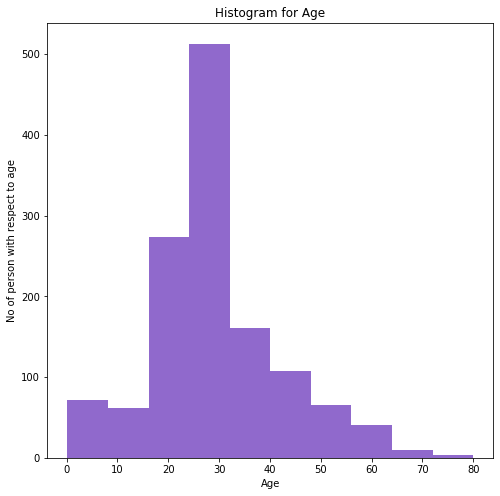

In [23]:
fig = plt.figure(figsize=(8,8))
plt.title('Histogram for Age')
plt.ylabel('No of person with respect to age')
plt.xlabel('Age')
plt.hist(titanic['age'],color = '#9069CC')